<a href="https://colab.research.google.com/github/IsabelleAP/Linguagem-Python/blob/main/Prediction_of_a_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Agente causador da doença respiratória**
Modelo que prediz o **agente causador da doença** respiratória aguda grave **baseado nos dados e sintomas** dos pacientes

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
#extração dos dados
data = pd.read_csv("train.csv")
display(data)
#display(data[["MORB_DESC","RAIOX_OUT","OUT_AMOST","PAC_COCBO","PAC_DSCBO","OUT_ANIM","TOMO_OUT","ID"]])

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,...,PERD_PALA,TOMO_RES,TOMO_OUT,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FNT_IN_COV,DELTA_UTI,ID
0,38,37,RS,005 CRS,1608.0,CAXIAS DO SUL,430510.0,M,73.0,3.0,...,NaN,NaN,NaN,2.0,0.0,0.0,0.0,1.0,-1.0,87360a9a-5516-4b0c-9c76-faceb759e97b
1,46,46,MS,NRS DE PONTA PORA,1972.0,PONTA PORA,500660.0,M,27.0,3.0,...,2.0,NaN,NaN,9.0,0.0,0.0,0.0,1.0,-1.0,e5532e89-f7e8-4239-991b-16cf3c3a5be6
2,18,17,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,F,2.0,3.0,...,2.0,6.0,NaN,1.0,1.0,1.0,0.0,2.0,-1.0,dbaa33c2-d374-48d7-a0f3-f0775550b1a4
3,4,3,SP,GVE VII SANTO ANDRE,1332.0,MAUA,352940.0,F,71.0,3.0,...,2.0,6.0,NaN,1.0,1.0,1.0,0.0,2.0,-1.0,ecbf8128-42a7-4668-be28-905b6168578d
4,12,11,MG,JANUARIA,1470.0,SAO JOAO DA PONTE,316240.0,F,91.0,3.0,...,2.0,NaN,NaN,2.0,0.0,0.0,0.0,1.0,-1.0,4b74f720-bd35-42b0-8590-127985c79653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538149,10,9,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,F,56.0,3.0,...,9.0,9.0,NaN,9.0,0.0,0.0,0.0,1.0,-1.0,3faf8768-df00-489f-beb8-6347c79fb9aa
538150,43,42,PR,02RS METROPOLITANA,1356.0,CAMPO LARGO,410420.0,M,71.0,3.0,...,2.0,1.0,NaN,2.0,0.0,0.0,0.0,2.0,-1.0,b89e6f7d-727a-4a0e-b118-a933ce6fffaf
538151,16,16,RS,001 CRS,1592.0,MONTENEGRO,431240.0,F,69.0,3.0,...,2.0,6.0,NaN,1.0,1.0,0.0,0.0,1.0,-1.0,78b407ae-96a7-4834-b8dc-5ab6db86e946
538152,1,1,SE,REGIONAL ARACAJU,2056.0,ARACAJU,280030.0,M,45.0,3.0,...,NaN,5.0,HEMATOMA TALAMICO,NaN,0.0,0.0,0.0,NaN,-1.0,ff216681-b8e8-4083-bbe5-f04f70d9c1db


In [ ]:
#raioxout não tem informação alguma
#outanim também não

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191568 entries, 0 to 191567
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_NOT     191568 non-null  int64  
 1   SEM_PRI     191568 non-null  int64  
 2   SG_UF_NOT   191568 non-null  object 
 3   ID_REGIONA  170664 non-null  object 
 4   CO_REGIONA  170664 non-null  float64
 5   ID_MUNICIP  191568 non-null  object 
 6   CO_MUN_NOT  191568 non-null  int64  
 7   CS_SEXO     191568 non-null  object 
 8   NU_IDADE_N  191568 non-null  int64  
 9   TP_IDADE    191568 non-null  int64  
 10  COD_IDADE   191568 non-null  object 
 11  CS_GESTANT  191568 non-null  int64  
 12  CS_RACA     191568 non-null  int64  
 13  CS_ESCOL_N  125397 non-null  float64
 14  SG_UF       191546 non-null  object 
 15  CS_ZONA     173446 non-null  float64
 16  SURTO_SG    8782 non-null    float64
 17  NOSOCOMIAL  161947 non-null  float64
 18  AVE_SUINO   159839 non-null  float64
 19  FE

In [26]:
#organização e limpeza dos dados (ajuste e tratamento)
#fazer os object serem reconhecidos como número

data["PAC_COCBO"] = pd.to_numeric(data["PAC_COCBO"], errors="coerce")
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538154 entries, 0 to 538153
Data columns (total 76 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_NOT     538154 non-null  int64  
 1   SEM_PRI     538154 non-null  int64  
 2   SG_UF_NOT   538154 non-null  object 
 3   ID_REGIONA  478328 non-null  object 
 4   CO_REGIONA  478327 non-null  float64
 5   ID_MUNICIP  538153 non-null  object 
 6   CO_MUN_NOT  538153 non-null  float64
 7   CS_SEXO     538153 non-null  object 
 8   NU_IDADE_N  538153 non-null  float64
 9   TP_IDADE    538153 non-null  float64
 10  COD_IDADE   538153 non-null  object 
 11  CS_GESTANT  538153 non-null  float64
 12  CS_RACA     538153 non-null  float64
 13  CS_ESCOL_N  350607 non-null  float64
 14  SG_UF       538071 non-null  object 
 15  CS_ZONA     484924 non-null  float64
 16  SURTO_SG    28429 non-null   float64
 17  NOSOCOMIAL  454559 non-null  float64
 18  AVE_SUINO   447996 non-null  float64
 19  FE

None

In [29]:
display(data.corr())

,SEM_NOT,SEM_PRI,CO_REGIONA,CO_MUN_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,CS_ZONA,...,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FNT_IN_COV,DELTA_UTI
SEM_NOT,1.000000,0.897296,-0.040119,0.035948,-0.087031,-0.035822,0.004725,-0.003112,-0.001711,0.006961,...,-0.014387,-0.010327,-0.009913,0.088520,-0.093581,0.189215,0.174331,0.080891,0.128195,NaN
SEM_PRI,0.897296,1.000000,-0.039310,0.033302,-0.084451,-0.039213,-0.000544,-0.006060,-0.004538,0.005057,...,-0.016792,-0.012723,-0.012278,0.106568,-0.121785,0.214314,0.203006,0.084057,0.172249,NaN
CO_REGIONA,-0.040119,-0.039310,1.000000,-0.179380,0.001498,0.009626,-0.003540,0.046817,-0.033817,-0.011770,...,-0.022938,-0.015646,-0.015282,-0.017229,-0.003264,-0.035835,-0.034160,-0.031679,-0.008192,NaN
CO_MUN_NOT,0.035948,0.033302,-0.179380,1.000000,0.018998,0.002596,0.003025,-0.135168,0.024580,-0.026589,...,-0.035437,-0.032109,-0.033199,-0.126712,-0.050829,0.059962,0.055659,0.045236,0.002372,NaN
NU_IDADE_N,-0.087031,-0.084451,0.001498,0.018998,1.000000,0.405377,-0.067035,-0.084875,0.030301,-0.009232,...,-0.031001,-0.022255,-0.024639,-0.218209,-0.018690,0.334192,0.339566,0.218278,-0.120218,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DOSE_1_COV,0.189215,0.214314,-0.035835,0.059962,0.334192,0.172308,-0.066120,-0.076328,-0.007684,0.002329,...,-0.035245,-0.028936,-0.028001,0.020182,-0.470906,1.000000,0.843741,0.437084,0.315392,NaN
DOSE_2_COV,0.174331,0.203006,-0.034160,0.055659,0.339566,0.148564,-0.055150,-0.065325,0.004060,0.005782,...,-0.027519,-0.022140,-0.020854,0.037826,-0.407464,0.843741,1.000000,0.500348,0.363702,NaN
DOSE_REF,0.080891,0.084057,-0.031679,0.045236,0.218278,0.082603,-0.031314,-0.037547,0.019044,0.025500,...,-0.011419,-0.012025,-0.011815,0.046371,-0.211892,0.437084,0.500348,1.000000,0.345004,NaN
FNT_IN_COV,0.128195,0.172249,-0.008192,0.002372,-0.120218,-0.099627,0.018486,0.026882,0.025487,0.029903,...,0.005665,0.008630,0.010625,0.191753,-0.413972,0.315392,0.363702,0.345004,1.000000,NaN


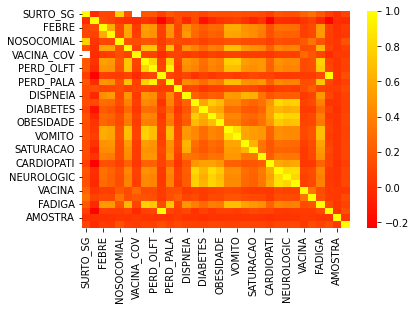

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data[["CS_SEXO","SURTO_SG","NU_IDADE_N","FEBRE","TOSSE","NOSOCOMIAL","OBES_IMC","GARGANTA","VACINA_COV","DOR_ABD","PERD_OLFT","TOMO_RES","PERD_PALA","RAIOX_RES","DISPNEIA","ASMA","DIABETES","PNEUMOPATI","OBESIDADE","DIARREIA","VOMITO","DESC_RESP","SATURACAO","OUTRO_SIN","CARDIOPATI","HEPATICA","NEUROLOGIC","RENAL","VACINA","ANTIVIRAL","FADIGA","TOMO_RES","AMOSTRA","UTI"]].corr(), cmap="autumn")
plt.show()

In [ ]:
#treinamento da máquina

In [ ]:
#testando a máquina

In [ ]:
#previsões